# UE 4268 - QISKIT Project 1


**`vos noms et prenoms`**, `matricule` et `email` 


Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire`

`Date`

## Projet 1.1 Représentation matricielle dans la base Standard

1. Calculer manuellement
$$
\rho = 4\mathbb{I}\otimes\mathbb{I} + 2\mathbb{I}\otimes\mathtt{X} 
+ 4\mathbb{I}\otimes\mathtt{Z} - \mathtt{X}\otimes\mathtt{X}
+ 5\mathtt{Y}\otimes\mathtt{Y} + 2\mathtt{Z}\otimes\mathtt{X}.
$$

2. Utiliser les classes appropriées de Qiskit pour obtenir la représentation matricielle de $\rho$ et avec visualisation en LaTeX. Quelle est la dimension de $\rho$?

### Calcul manuel

Compte tenu de la forme matricielle des opérateurs de Pauli dans la base standard, on a
\begin{align*}
\begin{split}
\rho& = 4\begin{pmatrix}\mathbb{I} & \mathbb{O} \\ \mathbb{O} & \mathbb{I}\end{pmatrix}
+2\begin{pmatrix}\mathtt{X} & \mathbb{O} \\ \mathbb{O} & \mathtt{X}\end{pmatrix}
+4\begin{pmatrix}\mathtt{Z} & \mathbb{O} \\ \mathbb{O} & \mathtt{Z}\end{pmatrix}
-\begin{pmatrix}\mathbb{O} & \mathtt{X} \\ \mathtt{X} & \mathbb{O}\end{pmatrix}\\
&+5\begin{pmatrix}\mathbb{O} & -i\mathtt{Y} \\ i\mathtt{Y} & \mathbb{O}\end{pmatrix}
+2\begin{pmatrix}\mathtt{X} & \mathbb{O} \\ \mathbb{O} & -\mathtt{X}\end{pmatrix}\\
&=\begin{pmatrix}4\mathbb{I}+2\mathtt{X}+4\mathtt{Z} & -\mathtt{X}-5i\mathtt{Y} \\ 
-\mathtt{X}+5i\mathtt{Y} & 4\mathbb{I}+4\mathtt{Z} \end{pmatrix}
= \begin{pmatrix}
          8 & 4 & 0 & -6\\
          4 & 0 & 4 & 0\\
          0 & 4 & 8 & 0\\
          -6 & 0 & 0 & 0
        \end{pmatrix}.
\end{split}
\end{align*}


### Simulation avec Qiskit

In [5]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.visualization import array_to_latex

In [6]:
# Définition des opérateurs 
II = Operator(Pauli('II'))
IX = Operator(Pauli('IX'))
IZ = Operator(Pauli('IZ'))
XX = Operator(Pauli('XX'))
YY = Operator(Pauli('YY'))
ZX = Operator(Pauli('ZX'))

# Calcul de rho 
rho = 4*II + 2*IX + 4*IZ - XX + 5*YY + 2*ZX

# Visualisation en LaTeX 
array_to_latex(rho, prefix='\\rho=')

<IPython.core.display.Latex object>

In [7]:
rho.dim

(4, 4)

## Projet 1.2  Décomposition de Pauli d'une matrice

1. Montrer manuellement que toute matrice $M$, en prenant le cas où $\dim_M=2$ peut s'écrire sous la forme (voir la sous-section **4.1.0.1 Décomposition de Pauli**)
$$
\mathtt{M}=\sum_j^{N_k}w_j\bigg(\bigotimes_i^{M-1}\mathtt{X}_i^j\bigg),
$$

2. Utilisez la classe `qiskit.quantum_info.SparsePauliOp` pour trouver les coefficients $w_j$ de la matrice
$$ \begin{bmatrix}8 & 4 & 0 & -6  \\ 4 & 0 & 4 & 0  \\ 0 & 4 & 8 & 0  \\ -6 & 0 & 0 & 0  \end{bmatrix}.$$


### Décomposition de Pauli d'une matrice

$$ M = \begin{pmatrix} m_{00} & m_{01} \\ m_{10} & m_{11} \end{pmatrix} = m_{00}|0\rangle\langle 0| + m_{01}|1\rangle\langle 0| + m_{10}|0\rangle\langle 1| + m_{11}|1\rangle\langle 1| .$$
Or 
\begin{align*}
&|0\rangle\langle 0| = \frac12(\mathbb{I}+\mathtt{X}),
&&|1\rangle\langle 0| = \frac12(\mathtt{X}+i\mathtt{Y}),
&&|0\rangle\langle 1| = \frac12(\mathtt{X}-i\mathtt{Y}),
&|1\rangle\langle 1| = \frac12(\mathbb{I}-\mathtt{Z}).
\end{align*}
Ainsi,
\begin{equation*}
\begin{split}
M & = \frac{m_{00}}{2}(\mathbb{I}+\mathtt{Z}) + \frac{m_{01}}{2}(\mathtt{X}+i\mathtt{Y}) 
+ \frac{m_{10}}{2}(\mathtt{X}-i\mathtt{Y}) + \frac{m_{11}}{2}(\mathbb{I}-\mathtt{Z})\\
  & = \frac12(m_{00}+m_{11})\mathbb{I}+\frac12(m_{01}+m_{10})\mathtt{X}+\frac i2(m_{01}-m_{10})\mathtt{Y}+\frac12(m_{00}-m_{11})\mathtt{Z}.
\end{split}
\end{equation*}

### Code Qiskit pour trouver les coefficients $w_j$ de la matrice

In [8]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp

In [9]:
M =  np.array([[8,4,0,-6],[4,0,4,0],[0,4,8,0],[-6,0,0,0]])
array_to_latex(M, prefix='M=')

<IPython.core.display.Latex object>

In [10]:
Operator(M).output_dims()

(2, 2)

In [11]:
SparsePauliOp.from_operator(M)

SparsePauliOp(['II', 'IX', 'IZ', 'XX', 'YY', 'ZX'],
              coeffs=[ 4.+0.j,  2.+0.j,  4.+0.j, -1.+0.j,  5.+0.j,  2.+0.j])

## Projet 1.3 Simulation de la détection interférométrique d'une superposition quantique d'états d'énantiomères gauches et droits
En chimie, les molécules ou les ions qui sont des images miroir les uns des autres sont appelés **énantiomères** ou **isomères optiques**. Si ces images ne sont pas superposables, on les appelle des **[molécules chirales](https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Map:_Organic_Chemistry_(Vollhardt_and_Schore)/05._Stereoisomers/5.1:_Chiral__Molecules)**. Elles se distinguent par leur capacité à faire tourner la lumière polarisée plane vers la gauche ou la droite. Il existe une [expérience](https://journals.aps.org/prx/pdf/10.1103/PhysRevX.11.031056) permettant de préparer une superposition quantique d'états gauches et droits d'énantiomères et de réaliser une détection interférométrique des forces dépendant de la chiralité.

Nous voulons concevoir, avec la bibliothèque Qiskit, un circuit quantique inspiré de l'interféromètre impliquant des énantiomères. Nous représentons un seul énantiomère avec deux qubits $|q_1q_0\rangle$. 

Nous encodons la direction de propagation du qubit $|q_1\rangle$ 
* suivant l'axe horizontale comme l'état $|0\rangle$;
* et suivant l'axe verticale comme l'état $|1\rangle$. 

Nous encodons ce qui suit dans le qubit de la latéralité $|q_0\rangle$:
* un état gaucher comme l'état $|0\rangle$;
- Un état droitier comme l'état $|1\rangle$;
- une superposition d'états gauche et droit comme $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle$ obtenue par l'application d'une porte de walsh-Hadamard.

Nous simulons
* un miroir par la porte $\mathtt{X}$;
* un diviseur de faisceau ou Beam-Splitter par 
$$\mathtt{BS}=\tfrac{1}{\sqrt{2}}(\mathbb{I}+i\mathtt{X})=\tfrac{1}{\sqrt{2}}\begin{pmatrix} 1 & i\\ i & 1\end{pmatrix}.$$ 
Par convention, on affecte le changement de phase $\frac{\pi}{2}$ à la réflexion;
* un diviseur de faisceau polarisant ou polarizing beam splitter par 
$$\mathtt{PBS}=\mathtt{CX}=\begin{pmatrix} 1 & 0 & 0 & 0\\
0 & 0 & 0& 1\\0 & 0 &1 & 0\\0 & 1 & 0 & 0\end{pmatrix},$$ 
qui transmet l'état $|0\rangle$ et réfléchi l'etat $|1\rangle$. On note qu'ici il n'y a pas de changement de phase.

Nous définissons la fonction `show()`, qui affiche le dessin d'un circuit quantique et le état du vecteur d'état en utilisant LaTeX comme suit:

In [12]:
def show(qc):
    display(qc.draw(output='mpl'))
    s = qi.Statevector.from_instruction(qc)
    display(array_to_latex(s, prefix="\\text{state vector} = ", 
        precision = 2))
    return

1. Utiliser la classe `qiskit.extensions.UnitaryGate` pour créer les portes BS et PBS.
2. Simuler l'action du PBS sur un énantiomère évoluant horizontalement et étant dans l'état droit. Visualiser le circuit quantique correspondant avant et après l'action du PBS. Commenter.
3. Simuler l'action du PBS sur un énantiomère évoluant horizontalement et étant dans une superposition d'états gauche et droit. Visualiser le circuit quantique correspondant avant et après l'action du PBS. Commenter.


In [13]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.extensions import UnitaryGate, XGate, IGate, CXGate
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex

### Création des portes BS et PBS 

In [14]:
BS = (qi.Operator(IGate()) + 1.j*qi.Operator(XGate()))/np.sqrt(2)
array_to_latex(BS)

<IPython.core.display.Latex object>

In [15]:
PBS = qi.Operator(CXGate())
array_to_latex(PBS)

<IPython.core.display.Latex object>

In [16]:
BS = UnitaryGate(BS,'BS')
PBS = UnitaryGate(PBS,'PBS')

### Définition de la fonction de visualisation `show()`

In [17]:
def show(qc):
    display(qc.draw(output='mpl'))
    s = qi.Statevector.from_instruction(qc)
    display(array_to_latex(s, prefix="\\text{state vector} = "))
    return

### Simulation de l'action du PBS sur $\ket{01}$

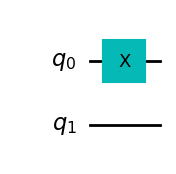

<IPython.core.display.Latex object>

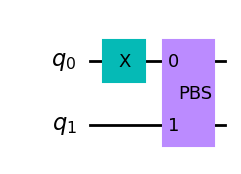

<IPython.core.display.Latex object>

In [18]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed,|1⟩ right-handed
# q[1] direction of propagation qubit,|0⟩ horizontal,|1⟩ vertical
qc = QuantumCircuit(q)
qc.x([0]) # Right-handed
show(qc)
qc.append(PBS, q)
show(qc)


L'énantiomère se déplaçant horizontalement et à l'état droit, représenté par
$|q_1q_0\rangle = |01\rangle$, a été réfléchi dans la direction verticale par le PBS. C'est ainsi qu'on en sortie, l'état $|q_1q_0\rangle = |11\rangle$.

### Simulation de l'action du PBS sur l'état superposé


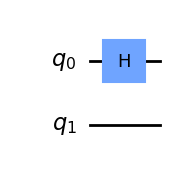

<IPython.core.display.Latex object>

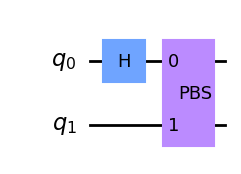

<IPython.core.display.Latex object>

In [19]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed,|1⟩ right-handed
# q[1] direction of propagation qubit,|0⟩ horizontal,|1⟩ vertical
qc = QuantumCircuit(q)
qc.h([0]) # Superposition state qubit
show(qc)
qc.append(PBS, q)
show(qc)

L'énantiomère se déplaçant horizontalement et à l'état droit, représenté par
$\ket{q_1q_0} = \ket{0}\otimes\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})=
\frac{1}{\sqrt{2}}(\ket{00}+\ket{01})$, a été transformé en état de Bell $\ket{q_1q_0} = \ket{B_{00}} = \frac{1}{\sqrt{2}}(\ket{00}+\ket{11})$.

In [20]:
import qiskit.tools.jupyter
%qiskit_version_table